#Imports

In [0]:
import sklearn
import numpy as np
import random
import time
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

#Preprocessing

In [0]:
mnist = keras.datasets.mnist
(train_images, train_label), (test_images, test_label) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
train_images=(train_images).reshape(60000,784)
test_images=(test_images).reshape(10000,784)

#Model

In [0]:
clf = LogisticRegression()
clf.fit(train_images,train_label)
prediction=clf.predict(test_images)
accuracy_score(prediction,test_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
test=np.empty([10000,784])
for i in range(10000):
  for j in range(784):
    test[i][j]=test_images[i][j]

#Distorting function

distort function takes distortion as input and gives a distorted dataset as the output

In [0]:
def distort(distortion):
  dist_test=np.empty([10000,784])
  for i in range(10000):
    for j in range(784):
      dist_test[i][j]=test[i][j]
    s=np.random.choice(784, (int)(784*distortion),replace=False)
    for k in s:
      dist_test[i][k]=random.randint(0,254)/255
  return dist_test

In [3]:
xstart = 5                       #Start of the box on x axis
xend = 23                        #end of the box on x axis
ystart = 5                       #start on y axis
yend = 23                        #end on y axis
distortion_list = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
print("Maximum Distortion that can be provided is: {:0.2f}".format((xend-xstart)*(yend-ystart)/784))

def boxdis(distortion):
  xchoice = np.arange(xstart,xend)
  ychoice = np.arange(ystart,yend)
  test = np.empty([10000,28,28])
  for i in range(10000):
    for j in range(28):
      for k in range(28):
        test[i][j][k] = test_images.reshape(10000,28,28)[i][j][k]
  for i in range(10000):
    for j in range(int(distortion*784)):
      test[i][random.randint(5,24)][random.randint(5,24)] = random.randint(0,254)/255
  return test.reshape(10000,784)

Maximum Distortion that can be provided is: 0.41


In [0]:
box_distorted = np.empty([len(distortion_list),10000,784])
norm_distorted = np.empty([len(distortion_list),10000,784])
for i,distortion in enumerate(distortion_list):
  box_distorted[i] = boxdis(distortion)
  norm_distorted[i] = distort(distortion)

##Visualising Distortions:

9182


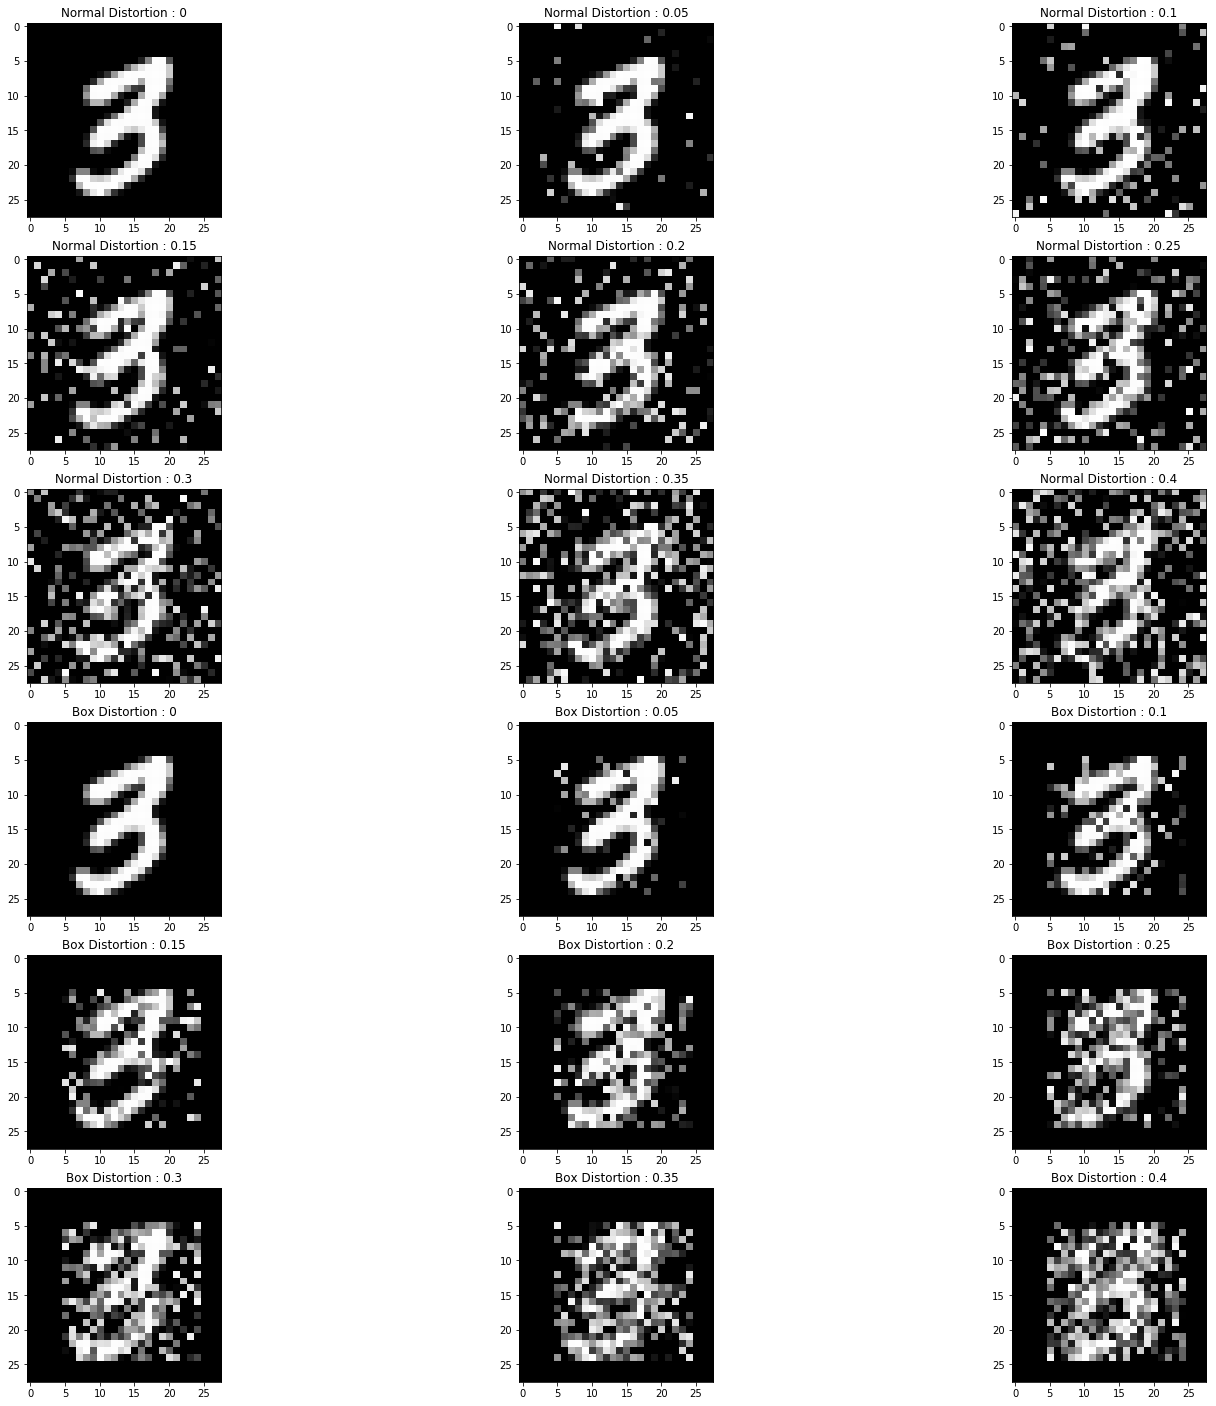

In [18]:
index = random.randint(0,9999)
print(index)
fig = plt.gcf()
fig.set_size_inches(25,25)
for i in range(len(distortion_list)):
  plt.subplot(6,3,i+1)
  plt.imshow(norm_distorted[i][index].reshape(28,28),cmap='gray')
  plt.title("Normal Distortion : {}".format(distortion_list[i]))
  plt.subplot(6,3,i+1+len(distortion_list))
  plt.imshow(box_distorted[i][index].reshape(28,28),cmap='gray')
  plt.title("Box Distortion : {}".format(distortion_list[i]))  

#Result

Distortion	Normal		Boxed
0 		 0.9201 		 0.9201
0.05 		 0.8667 		 0.8698
0.1 		 0.7597 		 0.7647
0.15 		 0.6437 		 0.6507
0.2 		 0.5549 		 0.5527
0.25 		 0.4775 		 0.4731
0.3 		 0.4189 		 0.421
0.35 		 0.377 		 0.3631
0.4 		 0.3305 		 0.3263


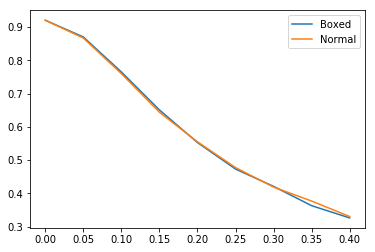

In [35]:
boxed = np.empty([len(distortion_list),10000,784])
norm = np.empty([len(distortion_list),10000,784])
boxed_acc = np.empty([len(distortion_list)])
norm_acc = np.empty([len(distortion_list)])
print("Distortion\tNormal\t\tBoxed")
for j, distortion in enumerate(distortion_list):
  boxed[j] = distort(distortion)
  boxed_acc[j] = accuracy_score(clf.predict(boxed[j]),test_label)
  norm[j] = boxdis(distortion)
  norm_acc[j] = accuracy_score(clf.predict(norm[j]),test_label)
  print(distortion,"\t\t",norm_acc[j],"\t",boxed_acc[j])

plt.plot(distortion_list,boxed_acc,label = "Boxed")
plt.plot(distortion_list,norm_acc,label = "Normal")
plt.xlabel("Distortion")
plt.ylabel(Accuracy)
plt.legend()
plt.title("Accuracy vs Distortion")
plt.show()